In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
csv_path = r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Images\Eval\perf.csv"

plt.style.use('seaborn-v0_8-whitegrid')

plt.rcParams['font.size'] = 16  # Set the global font size
plt.rcParams['font.family'] = "serif"

In [11]:
from pandas import DataFrame


df: DataFrame = pd.read_csv(csv_path)

for i in range(2, len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i] - df.iloc[:, i-1]

# Print the modified dataframe
print(df)

   Resolution    Terrain  Atmosphere      Clouds       Trees
0         100   1.926995    0.087780    2.873977    3.378294
1         200   3.510479    0.269061    6.510668    8.516425
2         300   6.112149    0.347049   11.967640   16.996128
3         400   9.453465    0.646592   18.841901   23.660476
4         500  12.907800    0.799494   24.654127   34.846251
5         600  16.391758    1.691119   38.497239   48.017440
6         800  27.206470    2.483031   65.976480   86.274619
7        1000  38.231049    3.371765   95.897362  122.110603
8        1500  72.759995    6.969116  195.902390  241.886856


In [12]:
def plot_stacked_bars(df, save_path):
    # Check if the dataframe has enough columns
    if df.shape[1] < 2:
        raise ValueError("Dataframe must have at least two columns")
    
    # Prepare the data
    x = df.iloc[:, 0] #* df.iloc[:, 0] 
    y = df.iloc[:, 1:]  # remaining columns as data for the stacked bar
    
    # Bottom of the bar starts at 0
    bottoms = pd.Series([0] * len(df))
    
    # Set up the plot, white background
    fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', edgecolor='black')
    
    # Create a color map
    colors = plt.cm.get_cmap('tab20', len(y.columns))
    
    # Plot each column as a part of the stack
    width = 0.025 * (x.max() - x.min())  # Width of the bar
    for idx, column in enumerate(y.columns):
        ax.bar(x, y[column], bottom=bottoms, label=column, color=colors(idx), width=width)
        # Update the bottoms for the next stack
        bottoms += y[column]

    # connect the tops of the bars with a line
    ax.plot(x, bottoms, color='black', lw=2, marker='o', markersize=10, label='Total Time')

    ax.axhline(y=1000/60, color='black', linestyle='--', linewidth=2, label='60 FPS')
    ax.axhline(y=1000/30, color='gray', linestyle='--', linewidth=2, label='30 FPS')
    
    # Labeling
    ax.set_xlabel("Screen Resolution Dimension (pixels)")
    ax.set_ylabel("Average Time per Frame (ms)")
    legend = ax.legend(loc='upper left', frameon=True)
    legend.get_frame().set_edgecolor('gray')  # Set the border color
    legend.get_frame().set_facecolor('white')  # Set the background color
    
    # Show the plot
    plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

    if save_path:
        fig.savefig(save_path, format='svg', facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())

C:\Users\user\AppData\Local\Temp\ipykernel_14580\1115529647.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(y.columns))


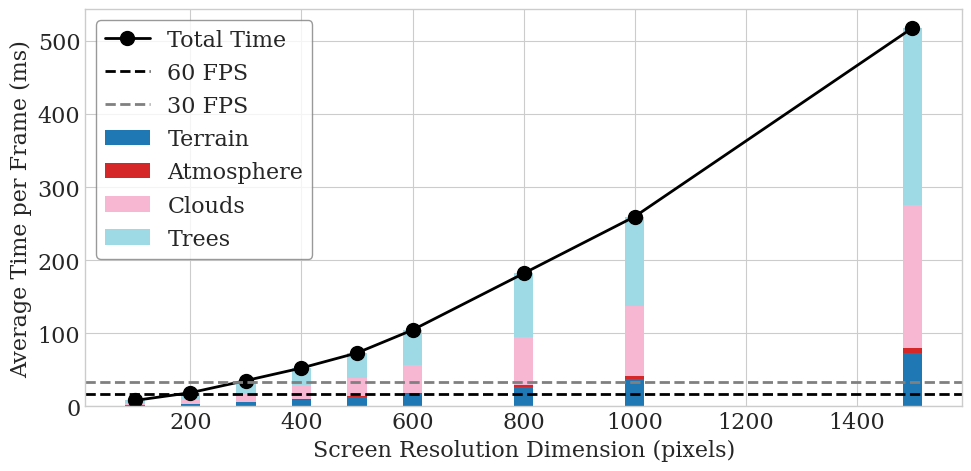

In [13]:
plot_stacked_bars(
    df,
    r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Source\Shaders\Evaluation\perf.svg",
)
# plt.style.available
# plt.colormaps()

In [14]:
import numpy as np
np.sqrt(1200 * 700)

916.515138991168

In [15]:
def plot_lines(df, save_path):
    # Check if the dataframe has enough columns
    if df.shape[1] < 2:
        raise ValueError("Dataframe must have at least two columns")
    
    # Prepare the data
    x = df.iloc[:, 0] #* df.iloc[:, 0] 
    y = df.iloc[:, 1:]  # remaining columns as data for the stacked bar
    
    # Bottom of the bar starts at 0
    bottoms = pd.Series([0] * len(df))
    
    # Set up the plot, white background
    fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', edgecolor='black')
    
    # Create a color map
    colors = plt.cm.get_cmap('tab20', len(y.columns))
    
    # Plot each column as a part of the stack
    for idx, column in enumerate(y.columns):
        ax.plot(x, y[column], label=column, color=colors(idx), lw=2, marker='o', markersize=10)
        
    # Labeling
    ax.set_xlabel("Screen Resolution Dimension (pixels)")
    ax.set_ylabel("Average Time per Frame (ms)")
    legend = ax.legend(loc='upper left', frameon=True)
    legend.get_frame().set_edgecolor('gray')  # Set the border color
    legend.get_frame().set_facecolor('white')  # Set the background color
    
    # Show the plot
    plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

    if save_path:
        fig.savefig(save_path, format='svg', facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())

C:\Users\user\AppData\Local\Temp\ipykernel_14580\433400841.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(y.columns))


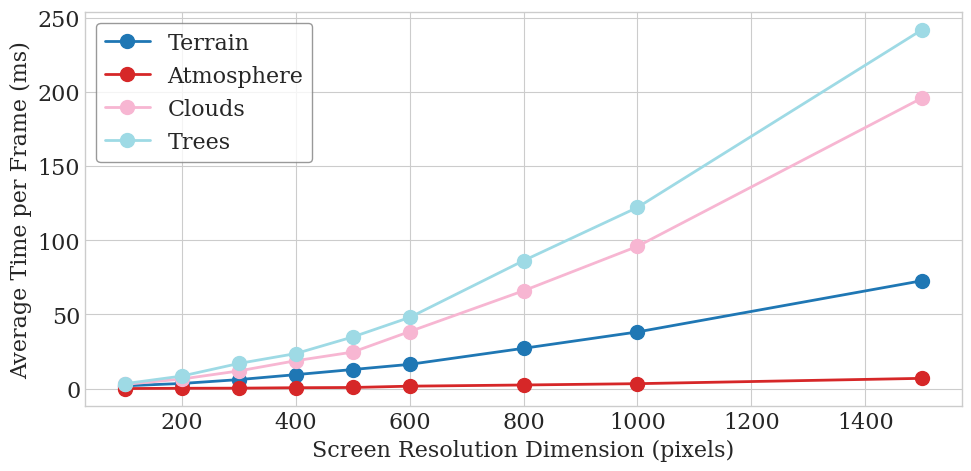

In [16]:
plot_lines(
    # only the first and third columns of df
    # df.iloc[:, [0, 2]],
    df,
    r"C:\Users\user\Documents\George\CPP_Projects\Procedural_Implicit_Terrain_Raymarching\Source\Shaders\Evaluation\perf_lines.svg",
)